# PROJET BAYES WINBUGS VOL.1 - OXFORD

## Participants :
---------------
Abdellah KOUTIT & 
Saâd AZIZ ALAOUI & 
Simone IANNELLI & 
Karim IDRISSI.

---------------

## Data Preprocessing & Import Librairies

In [1]:
import numpy as np
import pandas as pd
from scipy.special import expit
from numpy.random import gamma, normal
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import trange

In [5]:
r1 = np.array([3, 5, 2, 7, 7, 2, 5, 3, 5, 11, 6, 6, 11, 4, 4, 2, 8, 8, 6,  
               5, 15, 4, 9, 9, 4, 12, 8, 8, 6, 8, 12, 4, 7, 16, 12, 9, 4, 7, 
               8, 11, 5, 12, 8, 17, 9, 3, 2, 7, 6, 5, 11, 14, 13, 8, 6, 4, 8, 
               4, 8, 7, 15, 15, 9, 9, 5, 6, 3, 9, 12, 14, 16, 17, 8, 8, 9, 5, 
               9, 11, 6, 14, 21, 16, 6, 9, 8, 9, 8, 4, 11, 11, 6, 9, 4, 4, 9, 
               9, 10, 14, 6, 3, 4, 6, 10, 4, 3, 3, 10, 4, 10, 5, 4, 3, 13, 1, 
               7, 5, 7, 6, 3, 7])
n1 = np.array([28, 21, 32, 35, 35, 38, 30, 43, 49, 53, 31, 35, 46, 53, 61, 
               40, 29, 44, 52, 55, 61, 31, 48, 44, 42, 53, 56, 71, 43, 43, 43, 
               40, 44, 70, 75, 71, 37, 31, 42, 46, 47, 55, 63, 91, 43, 39, 35, 
               32, 53, 49, 75, 64, 69, 64, 49, 29, 40, 27, 48, 43, 61, 77, 55, 
               60, 46, 28, 33, 32, 46, 57, 56, 78, 58, 52, 31, 28, 46, 42, 45, 
               63, 71, 69, 43, 50, 31, 34, 54, 46, 58, 62, 52, 41, 34, 52, 63, 
               59, 88, 62, 47, 53, 57, 74, 68, 61, 45, 45, 62, 73, 53, 39, 45, 
               51, 55, 41, 53, 51, 42, 46, 54, 32])
r0 = np.array([0, 2, 2, 1, 2, 0, 1, 1, 1, 2, 4, 4, 2, 1, 7, 4, 3, 5, 3, 2, 
               4, 1, 4, 5, 2, 7, 5, 8, 2, 3, 5, 4, 1, 6, 5, 11, 5, 2, 5, 8, 
               5, 6, 6, 10, 7, 5, 5, 2, 8, 1, 13, 9, 11, 9, 4, 4, 8, 6, 8, 6, 
               8, 14, 6, 5, 5, 2, 4, 2, 9, 5, 6, 7, 5, 10, 3, 2, 1, 7, 9, 13, 
               9, 11, 4, 8, 2, 3, 7, 4, 7, 5, 6, 6, 5, 6, 9, 7, 7, 7, 4, 2, 
               3, 4, 10, 3, 4, 2, 10, 5, 4, 5, 4, 6, 5, 3, 2, 2, 4, 6, 4, 1])
n0 = np.array([28, 21, 32, 35, 35, 38, 30, 43, 49, 53, 31, 35, 46, 53, 61, 
               40, 29, 44, 52, 55, 61, 31, 48, 44, 42, 53, 56, 71, 43, 43, 43, 
               40, 44, 70, 75, 71, 37, 31, 42, 46, 47, 55, 63, 91, 43, 39, 35, 
               32, 53, 49, 75, 64, 69, 64, 49, 29, 40, 27, 48, 43, 61, 77, 55, 
               60, 46, 28, 33, 32, 46, 57, 56, 78, 58, 52, 31, 28, 46, 42, 45, 
               63, 71, 69, 43, 50, 31, 34, 54, 46, 58, 62, 52, 41, 34, 52, 63, 
               59, 88, 62, 47, 53, 57, 74, 68, 61, 45, 45, 62, 73, 53, 39, 45, 
               51, 55, 41, 53, 51, 42, 46, 54, 32])
year = np.array([-10, -9, -9, -8, -8, -8, -7, -7, -7, -7, -6, -6, -6, -6, -6, 
                 -5, -5, -5, -5, -5, -5, -4, -4, -4, -4, -4, -4, -4, -3, -3, -3, 
                 -3, -3, -3, -3, -3, -2, -2, -2, -2, -2, -2, -2, -2, -2, -1, -1, 
                 -1, -1, -1, -1, -1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 
                 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 
                 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 9, 9, 10])


df = pd.DataFrame({'year': year,'n0': n0, 'n1': n1, 'r0': r0, 'r1':r1})
df.reset_index(drop=True, inplace=True)
#df

## Fonctions Utilitaires pour le code 

In [9]:
#computes probablitiy p0 following the model
def po_proba(mu, alpha, beta1, beta2, b, year):

    return expit(mu + alpha + beta1 * year + beta2 * (year ** 2 - 22) + b)

In [10]:
#computes the log of the likelihood function
def log_likelihood(mu, alpha, beta1, beta2, b, r1, n1, year):

    p1 = po_proba(mu, alpha, beta1, beta2, b, year)
    
    return np.sum(r1 * np.log(p1)) + np.sum((n1 - r1) * np.log(1 - p1))

In [11]:
#initialization function
# def init_chain(N, chain_type=1):

#     if chain_type == 1:
#         alpha, beta1, beta2, sigma2 = 0, 0, 0, 1
#     else:
#         alpha, beta1, beta2, sigma2 = 1, 1, 1, 10

#     mu = np.zeros(N)
#     b = np.zeros(N)

#     return alpha, beta1, beta2, sigma2, mu, b

In [12]:
def gibbs_sampling(nchain, df , prop_sd):
    
    #nchain nombre d'années
    
    r0, n0, r1, n1, year = df['r0'], df['n0'], df['r1'], df['n1'], df['year']
    N = df.shape[0]
    
    alpha, beta1, beta2, sigma2 = 0 , 0 , 0 , 1
    mu, b = np.zeros(N) , np.zeros(N)
    
    #proposal standard deviation
    # prop_sd=np.array([0.06, 0.03, 0.006, 0.1, 0.5])

    
    log_psi = alpha + beta1 * year + beta2 * (year**2 - 22) + b
    p0 = expit(mu)
    p1 = expit(mu + log_psi)
    
    chain4 = np.zeros((nchain+1, 4)) 
    b_chain = np.zeros((nchain+1, N)) 
    mu_chain = np.zeros((nchain+1, N)) 
    
    
    # Chain Init
    chain4[0,0] = alpha
    chain4[0,1] = beta1
    chain4[0,2] = beta2
    chain4[0,3] = sigma2
    b_chain[0,:] = b
    mu_chain[0,:] = mu

    acc_rate = np.zeros(3)
    b_acc_rate = np.zeros(120)
    mu_acc_rate = np.zeros(120)
    
    # remplissons la chaîne
    for i in trange(nchain):
        
        LVR = log_likelihood(mu, alpha, beta1, beta2, b, r1, n1, year)
        
        # update alpha
        prop_alpha = np.random.normal(loc=alpha, scale=prop_sd[0])
        prop_p1_alpha = po_proba(mu, prop_alpha, beta1, beta2, b, year)

        top_alpha = - (prop_alpha ** 2 / (2 * 1e6)) + np.sum(r1 * np.log(prop_p1_alpha)) + np.sum((n1 - r1) * np.log(1 - prop_p1_alpha))
        bottom_alpha = - (alpha ** 2 / (2 * 1e6)) + LVR
        acc_prob_alpha = np.exp(top_alpha - bottom_alpha)
        
        U = np.random.uniform()
        if U < acc_prob_alpha:
            alpha = prop_alpha
            p1 = prop_p1_alpha
            acc_rate[0] += 1
        
        # update beta1
        prop_beta1 = np.random.normal(loc=beta1, scale=prop_sd[1])
        prop_p1_beta1 = po_proba(mu, alpha, prop_beta1, beta2, b, year)

        top_beta1 = - (prop_beta1 ** 2 / (2 * 1e6)) + np.sum(r1 * np.log(prop_p1_beta1)) + np.sum((n1 - r1) * np.log(1 - prop_p1_beta1))
        bottom_beta1 = - (beta1 ** 2 / (2 * 1e6)) + LVR
        acc_prob_beta1 = np.exp(top_beta1 - bottom_beta1)

        U = np.random.uniform()
        if U < acc_prob_beta1:
            beta1 = prop_beta1
            p1 = prop_p1_beta1
            acc_rate[1] += 1
            
        # update beta2
        prop_beta2 = np.random.normal(loc=beta2, scale=prop_sd[2])
        prop_p1_beta2 = po_proba(mu, alpha, beta1, prop_beta2, b, year)

        top_beta2 = - (prop_beta2 ** 2 / (2 * 1e6)) + np.sum(r1 * np.log(prop_p1_beta2)) + np.sum((n1 - r1) * np.log(1 - prop_p1_beta2))
        bottom_beta2 = - (beta2 ** 2 / (2 * 1e6)) + LVR
        acc_prob_beta2 = np.exp(top_beta2 - bottom_beta2)

        U = np.random.uniform()
        if U < acc_prob_beta2:
            beta2 = prop_beta2
            p1 = prop_p1_beta2
            acc_rate[2] += 1
            
        # update sigma2
        sigma2 = 1/gamma(shape = 1e-3 + N/2, scale = 1e-3 + 0.5 * sum(b**2))
            
        for j in range(N):
            
            # update mu
            prop = normal(loc = mu[j], scale = prop_sd[3])
            prop_p0 = expit(prop)
            prop_p1 = expit(prop + log_psi[j])
            
            top_mu = - (prop**2 / (2 * 1e6)) + r0[j] * np.log(prop_p0) + (n0[j] - r0[j]) * np.log(1 - prop_p0) + r1[j] * np.log(prop_p1) + (n1[j] - r1[j]) * np.log(1 - prop_p1)
            bottom_mu = - (mu[j]**2 / (2 * 1e6)) + r0[j] * np.log(p0[j]) + (n0[j] - r0[j]) * np.log(1 - p0[j]) + r1[j] * np.log(p1[j]) + (n1[j] - r1[j]) * np.log(1 - p1[j])
            
            acc_prob = np.exp(top_mu - bottom_mu)
            
            if np.random.uniform() < acc_prob:
                mu[j] = prop
                p0[j] = prop_p0
                p1[j] = prop_p1
                mu_acc_rate[j] += 1
                
                
            # update b
            prop = normal(loc = b[j], scale = prop_sd[4])
            prop_log_psi = alpha + beta1 * year[j] + beta2 * (year[j]**2 - 22) + prop
            prop_p1 = expit(mu[j] + prop_log_psi)
            
            top_b = - (prop**2 / (2 * sigma2)) + r1[j] * np.log(prop_p1) + (n1[j] - r1[j]) * np.log(1 - prop_p1)
            bottom_b = - (b[j]**2 / (2 * sigma2)) + r1[j] * np.log(p1[j]) + (n1[j] - r1[j]) * np.log(1 - p1[j])
            
            acc_prob = np.exp(top_b - bottom_b)
            
            if np.random.uniform() < acc_prob:
                b[j] = prop
                log_psi[j] = prop_log_psi
                p1[j] = prop_p1
                b_acc_rate[j] += 1
    
        
        # update of the chains
        chain4[i+1,:] = np.array([alpha, beta1, beta2, sigma2])
        b_chain[i+1,:] = b 
        mu_chain[i+1,:] = mu
        
    # return the three chains
    return chain4, b_chain, mu_chain, acc_rate, b_acc_rate, mu_acc_rate

In [13]:
#number of chains
nchain=10000
chain4, b_chain, mu_chain, acc_rate, b_acc_rate, mu_acc_rate= gibbs_sampling(nchain, df,np.array([0.06, 0.03, 0.006, 0.1, 0.5]))

  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [13:21<00:00, 12.47it/s]


In [14]:
burn_in=1000
# 1000 premières itérations sont le burn in pour nous 
alpha = chain4[burn_in:,0]
beta1 =  chain4[burn_in:,1]
beta2 = chain4[burn_in:,2]
sigma2 = chain4[burn_in:,3]
sigma = np.sqrt(sigma2)

results = pd.DataFrame()
results['alpha']=alpha
results['beta1']=beta1
results['beta2']=beta2
results['sigma']=sigma


In [15]:
results.head()

,alpha,beta1,beta2,sigma
0,0.500015,-0.006124,0.007030,0.129124
1,0.480431,-0.006124,0.007030,0.126576
2,0.480431,-0.006124,0.007030,0.136622
3,0.498936,-0.054298,0.007030,0.156245
4,0.498936,-0.042327,0.008314,0.129496


## Acc Rates des paramètres


In [ ]:
print("Le taux d'acceptation de alpha :" + str(acc_rate[0] / 100) + "%")
mean_alpha = np.mean(chain4[:,0])
print("La moyenne empirique de alpha :" + str(mean_alpha))
sd_alpha = np.std(chain4[:,0])
print("L'écart-type empirique de alpha :" + str(sd_alpha))

In [ ]:
print("Le taux d'acceptation de beta1 :" + str(acc_rate[1] / 100) + "%")
mean_beta_1 = np.mean(chain4[:,1])
print("La moyenne empirique de beta1 :" + str(mean_beta_1))
sd_beta_1 = np.std(chain4[:,1])
print("L'écart-type empirique de beta1 :" + str(sd_beta_1))

In [ ]:
print("Le taux d'acceptation de beta2 :" + str(acc_rate[2] / 100) + "%")
mean_beta_2 = np.mean(chain4[:,2])
print("La moyenne empirique de beta2 :" + str(mean_beta_2))
sd_beta_2 = np.std(chain4[:,2])
print("L'écart-type empirique de beta2 :" + str(sd_beta_2))

In [ ]:
mean_sigma = np.mean(np.sqrt(chain4[:,3]))
print("La moyenne empirique de sigma :" + str(mean_sigma))
sd_sigma = np.std(np.sqrt(chain4[:,3]))
print("L'écart-type empirique de sigma :" + str(sd_sigma))

## Visualisation des paramètres obtenus $\alpha , \beta_1 , \beta_2$ et $\sigma$ :

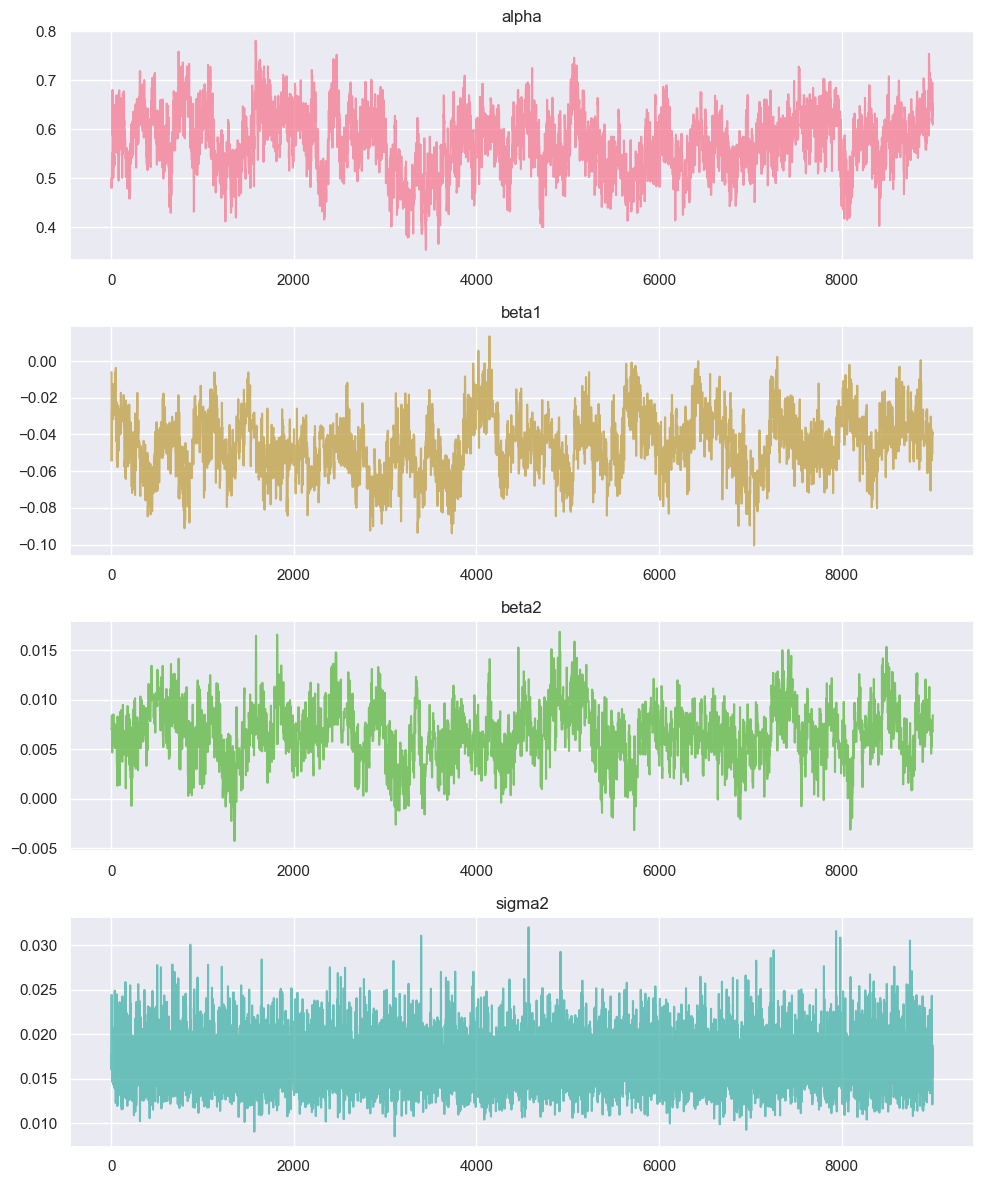

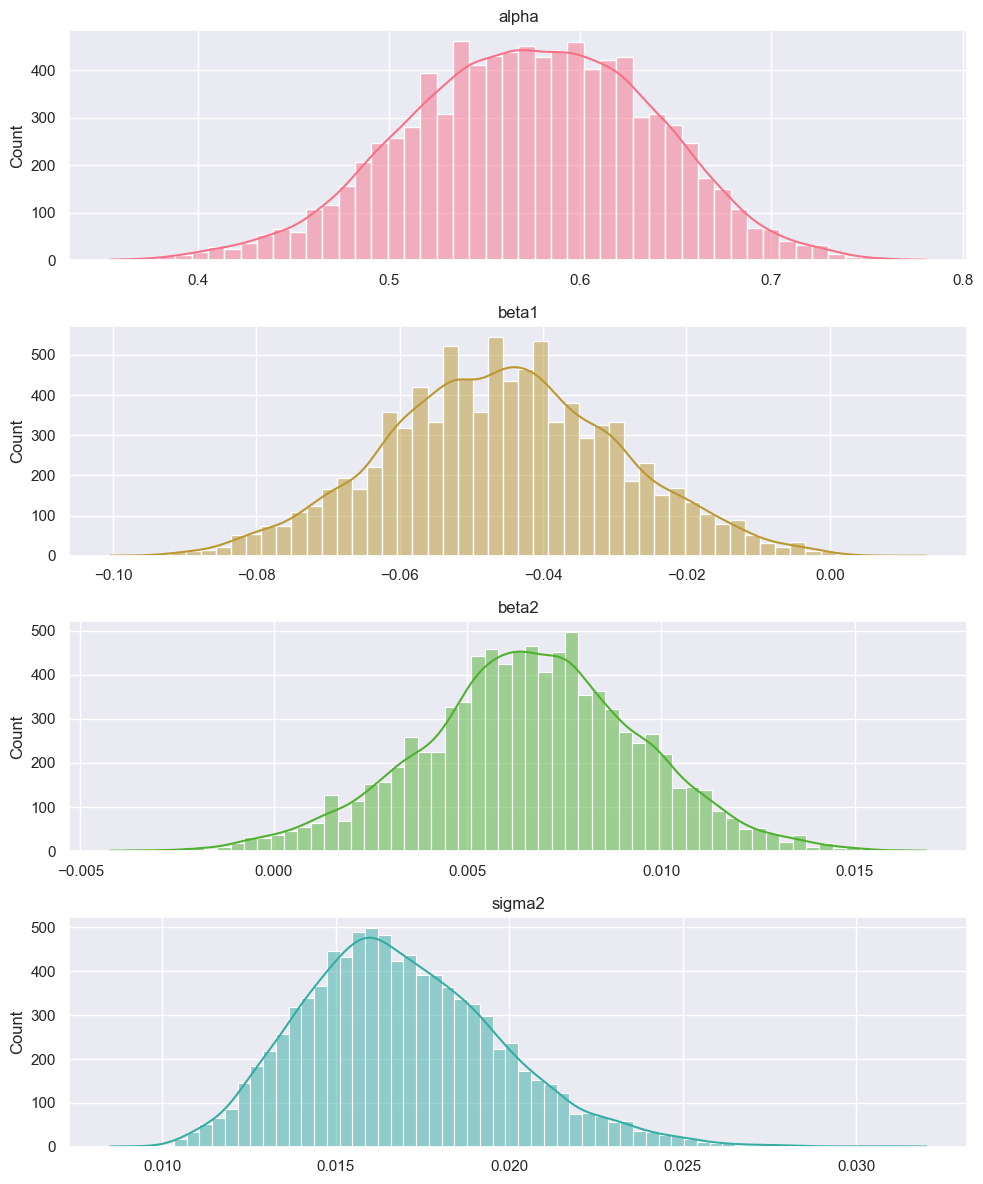

C:\Users\saada\AppData\Local\Temp\ipykernel_15284\3730920661.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Parameter', y='Value', data=melted_df, palette=custom_palette)
C:\Users\saada\AppData\Local\Temp\ipykernel_15284\3730920661.py:43: UserWarning: 
The palette list has fewer values (6) than needed (120) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='Parameter', y='Value', data=melted_df, palette=custom_palette)


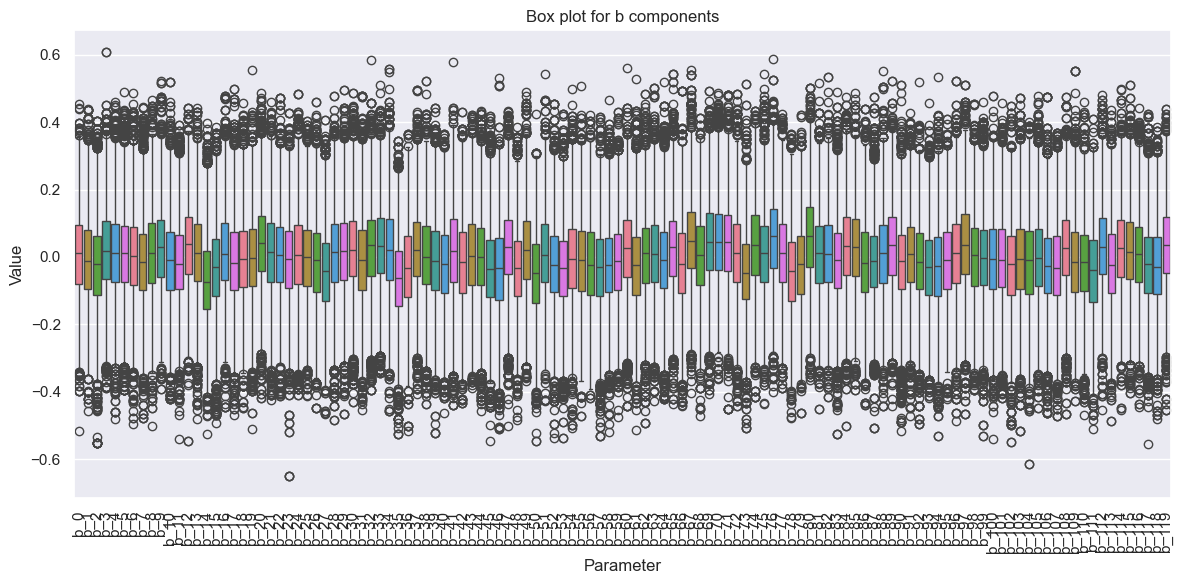

C:\Users\saada\AppData\Local\Temp\ipykernel_15284\3730920661.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Parameter', y='Value', data=melted_df, inner="quartile", palette=custom_palette)
C:\Users\saada\AppData\Local\Temp\ipykernel_15284\3730920661.py:45: UserWarning: 
The palette list has fewer values (6) than needed (120) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(x='Parameter', y='Value', data=melted_df, inner="quartile", palette=custom_palette)


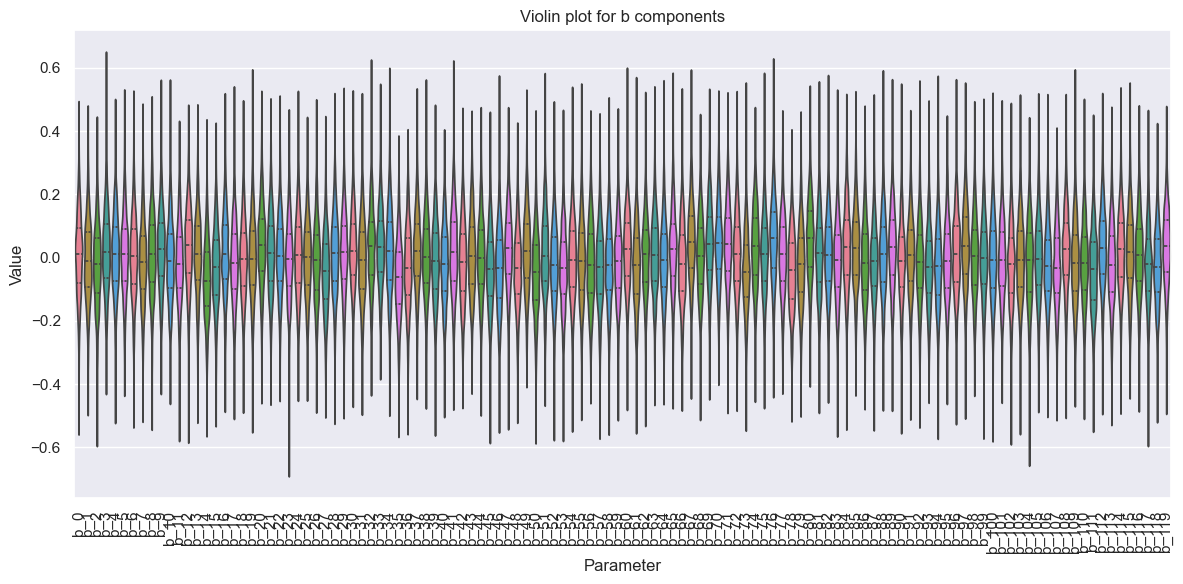

C:\Users\saada\AppData\Local\Temp\ipykernel_15284\3730920661.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Parameter', y='Value', data=melted_df, palette=custom_palette)
C:\Users\saada\AppData\Local\Temp\ipykernel_15284\3730920661.py:43: UserWarning: 
The palette list has fewer values (6) than needed (120) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='Parameter', y='Value', data=melted_df, palette=custom_palette)


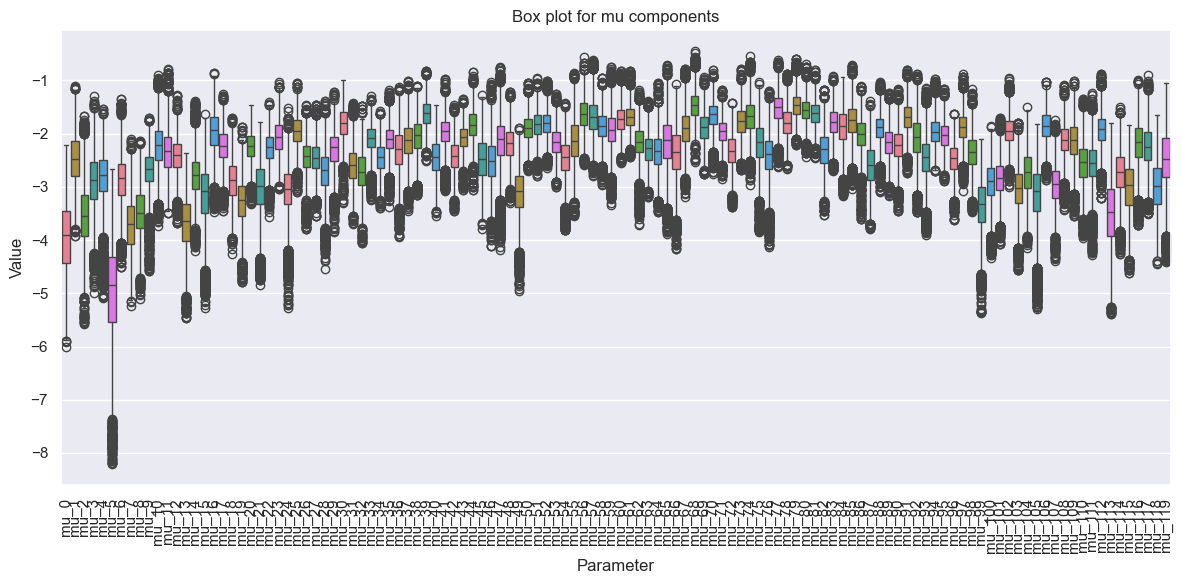

C:\Users\saada\AppData\Local\Temp\ipykernel_15284\3730920661.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Parameter', y='Value', data=melted_df, inner="quartile", palette=custom_palette)
C:\Users\saada\AppData\Local\Temp\ipykernel_15284\3730920661.py:45: UserWarning: 
The palette list has fewer values (6) than needed (120) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(x='Parameter', y='Value', data=melted_df, inner="quartile", palette=custom_palette)


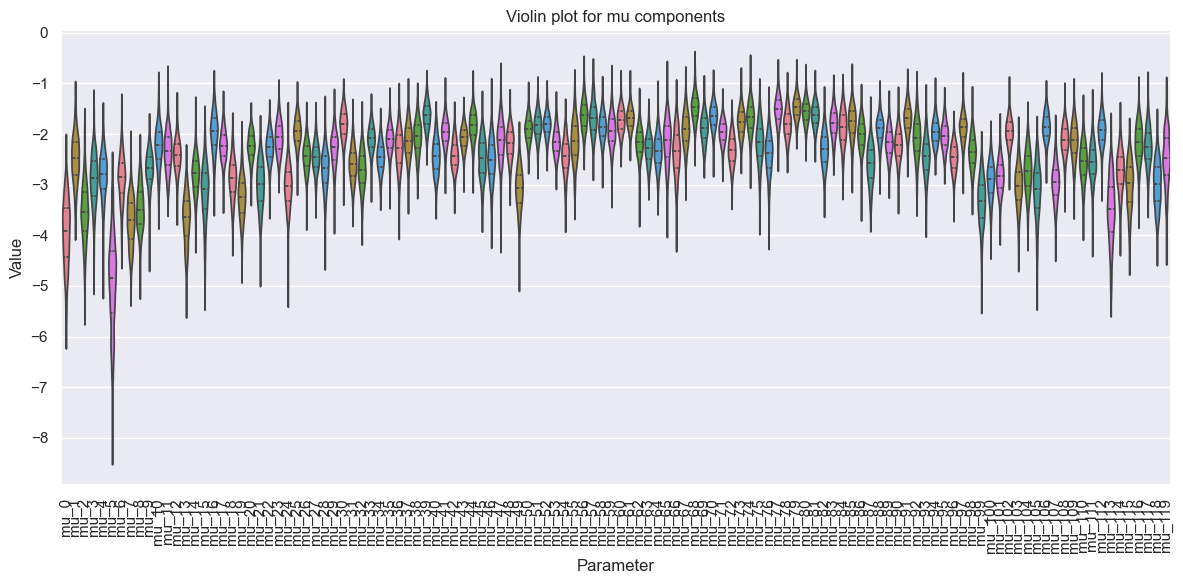

In [16]:
# Set the style for the plots and define custom color palette
sns.set(style="darkgrid")
custom_palette = sns.color_palette("husl")

# Trace plots
def plot_trace(chains, param_names, burn_in=0):
    n_params = len(param_names)
    fig, axes = plt.subplots(n_params, 1, figsize=(10, 3 * n_params))

    for idx, ax in enumerate(axes):
        ax.plot(chains[burn_in:, idx], color=custom_palette[idx], alpha=0.7)
        ax.set_title(param_names[idx])

    plt.tight_layout()
    plt.show()

# Histograms
def plot_histograms(chains, param_names, burn_in=0):
    n_params = len(param_names)
    fig, axes = plt.subplots(n_params, 1, figsize=(10, 3 * n_params))

    for idx, ax in enumerate(axes):
        sns.histplot(chains[burn_in:, idx], kde=True, ax=ax, color=custom_palette[idx])
        ax.set_title(param_names[idx])

    plt.tight_layout()
    plt.show()

# Summary statistics
def summarize_chains(chains, param_names, burn_in):
    summary_df = pd.DataFrame(chains[burn_in:], columns=param_names).describe().transpose()
    return summary_df

# Boxplot and violinplot
def plot_distributions(chains, param_names, burn_in, plot_type='boxplot', title=None):
    melted_df = pd.DataFrame(chains[burn_in:], columns=param_names).melt(var_name='Parameter', value_name='Value')
    plt.figure(figsize=(12, 6))
    if plot_type == 'boxplot':
        sns.boxplot(x='Parameter', y='Value', data=melted_df, palette=custom_palette)
    elif plot_type == 'violinplot':
        sns.violinplot(x='Parameter', y='Value', data=melted_df, inner="quartile", palette=custom_palette)
    if title:
        plt.title(title)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Plot trace plots and histograms for alpha, beta1, beta2, sigma2
param_names = ['alpha', 'beta1', 'beta2', 'sigma2']
plot_trace(chain4, param_names, burn_in)
plot_histograms(chain4, param_names, burn_in)

#number of stratas
N = df.shape[0]

# Plot boxplot and violinplot for b components
b_param_names = [f'b_{i}' for i in range(N)]
plot_distributions(b_chain, b_param_names, burn_in, plot_type='boxplot', title="Box plot for b components")
plot_distributions(b_chain, b_param_names, burn_in, plot_type='violinplot', title="Violin plot for b components")

# Plot boxplot and violinplot for mu components
mu_param_names = [f'mu_{i}' for i in range(N)]
plot_distributions(mu_chain, mu_param_names, burn_in, plot_type='boxplot', title="Box plot for mu components")
plot_distributions(mu_chain, mu_param_names, burn_in, plot_type='violinplot', title="Violin plot for mu components")
